# 1. ¿Qué es una imagen digital?

In [ ]:
# Una imagen digital está compuesta por pequeños cuadrados llamados píxeles.
# Cada píxel tiene un color, y la combinación de todos los colores forma la imagen completa.
# Podemos pensar en una imagen como una tabla de números, donde cada número representa el color de un píxel.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Operaciones básicas con imágenes

In [ ]:
!wget = 'https://www.discoverboating.com/sites/default/files/small-boats_1.jpg'

--2025-09-10 23:01:02--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-09-10 23:01:02--  https://www.discoverboating.com/sites/default/files/small-boats_1.jpg
Resolving www.discoverboating.com (www.discoverboating.com)... 172.67.70.228, 104.26.8.249, 104.26.9.249, ...
Connecting to www.discoverboating.com (www.discoverboating.com)|172.67.70.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 619075 (605K) [image/jpeg]
Saving to: ‘small-boats_1.jpg.1’

small-boats_1.jpg.1 100%[===================>] 604.57K  --.-KB/s    in 0.06s   

2025-09-10 23:01:03 (10.1 MB/s) - ‘small-boats_1.jpg.1’ saved [619075/619075]

FINISHED --2025-09-10 23:01:03--
Total wall clock time: 0.3s
Downloaded: 1 files, 605K in 0.06s (10.1 MB/s)


In [ ]:
# Cargar una imagen (asegúrate de que 'imagen.jpg' esté en la misma carpeta que este Colab, o subila)
imagen = cv2.imread('/content/small-boats_1.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertimos a RGB para matplotlib

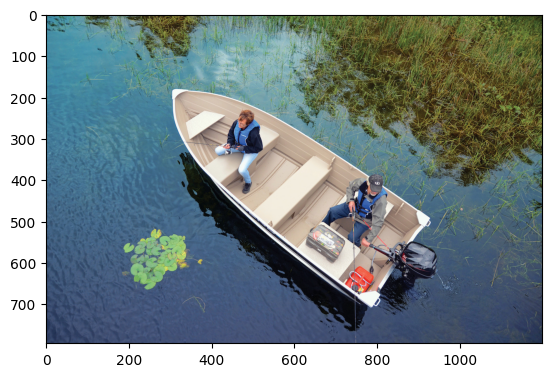

In [ ]:
plt.imshow(imagen)
plt.show()

In [ ]:
# Recortar la imagen
imagen_recortada = imagen[500:680, 180:380]  # Recortamos una porción de la imagen

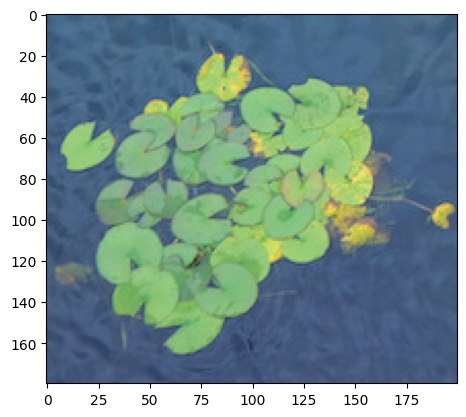

In [ ]:
plt.imshow(imagen_recortada)
plt.show()

In [ ]:
# Redimensionar la imagen
imagen_redimensionada = cv2.resize(imagen_recortada, (1200, 1100))  # Cambiamos el tamaño

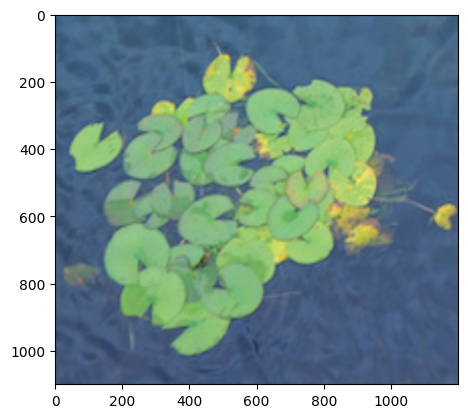

In [ ]:
plt.imshow(imagen_redimensionada)
plt.show()

In [ ]:
(alto, ancho) = imagen.shape[:2] # Obtener las dimensiones de la imagen (alto, ancho)
centro = (ancho / 2, alto / 2) # Calcular el centro de la imagen
# Obtener la matriz de rotación para rotar 45 grados alrededor del centro con un factor de escala de 0.5
matriz_rotacion = cv2.getRotationMatrix2D(centro, 45, 0.5)
# Aplicar la transformación afín (rotación) a la imagen recortada
imagen_rotada = cv2.warpAffine(imagen_recortada, matriz_rotacion, (ancho, alto))

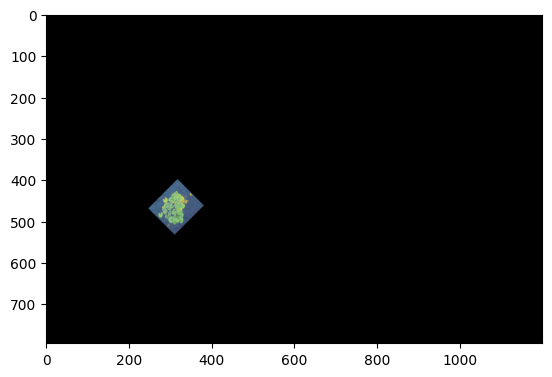

In [ ]:
plt.imshow(imagen_rotada)
plt.show()

In [ ]:
# Voltear la imagen
imagen_volteada_horizontal = cv2.flip(imagen_recortada, 1)  # Voltear horizontalmente (1)
imagen_volteada_vertical = cv2.flip(imagen_recortada, 0)  # Voltear verticalmente (0)
imagen_volteada_ambos = cv2.flip(imagen_recortada, -1) # Voltear en ambos sentidos (-1)

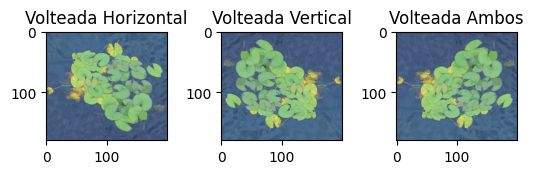

In [ ]:
# Mostrar los resultados
plt.subplot(3, 3, 1)
plt.imshow(imagen_volteada_horizontal)
plt.title('Volteada Horizontal')
plt.subplot(3, 3, 2)
plt.imshow(imagen_volteada_vertical)
plt.title('Volteada Vertical')
plt.subplot(3, 3, 3)
plt.imshow(imagen_volteada_ambos)
plt.title('Volteada Ambos')
plt.show()

# 3. Mejora de la imagen

In [ ]:
# Ajuste de brillo y contraste
def ajustar_brillo_contraste(imagen, brillo=0, contraste=1.0):
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=contraste, beta=brillo)
    return imagen_ajustada

In [ ]:
imagen_brillo_mas_50 = ajustar_brillo_contraste(imagen, brillo=50)
imagen_contraste_x1_5 = ajustar_brillo_contraste(imagen, contraste=1.5)

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(imagen_brillo_mas_50)
plt.title('Brillo +50')

plt.subplot(1, 2, 2)
plt.imshow(imagen_contraste_x1_5)
plt.title('Contraste x1.5')

plt.show()

In [ ]:
# Suavizado de la imagen (blur)
imagen_suavizada_media = cv2.blur(imagen, (5, 5))  # Promedio de los píxeles vecinos
imagen_suavizada_gaussiana = cv2.GaussianBlur(imagen, (5, 5), 0)  # Promedio ponderado (más peso a los píxeles cercanos)

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(imagen_suavizada_media)
plt.title('Imagen Suavizada Media')

plt.subplot(1, 2, 2)
plt.imshow(imagen_suavizada_gaussiana)
plt.title('Imagen Suavizada Gaussiana')

plt.show()

In [ ]:
# Detección de bordes
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)  # Convertimos a escala de grises para la detección de bordes
imagen_bordes_canny = cv2.Canny(imagen_gris, 100, 200)  # Detecta bordes en la imagen

In [ ]:
plt.imshow(imagen_bordes_canny, cmap='gray')
plt.title('Detección de Bordes Canny')
plt.show()

# 4. Segmentación de la imagen

In [ ]:
# Segmentación: Dividir la imagen en regiones o partes más pequeñas.

# Umbralización: Convertir la imagen a blanco y negro
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
_, imagen_umbralizada = cv2.threshold(imagen_gris, 128, 255, cv2.THRESH_BINARY)
# El segundo valor (128) es el umbral.  Si el píxel es menor a 128, se vuelve negro (0), si es mayor, se vuelve blanco (255).

In [ ]:
# Segmentación por color: Aislar objetos por su color (ejemplo: aislar el color azul)
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
limite_inferior_azul = np.array([100, 50, 50])  # Rango inferior del color azul en HSV
limite_superior_azul = np.array([130, 255, 255])  # Rango superior del color azul en HSV
mascara_azul = cv2.inRange(imagen_hsv, limite_inferior_azul, limite_superior_azul)  # Crear una máscara para el color azul
imagen_segmentada_azul = cv2.bitwise_and(imagen, imagen, mask=mascara_azul)  # Aplicar la máscara a la imagen original

In [ ]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralizada')
plt.subplot(1, 3, 3)
plt.imshow(imagen_segmentada_azul)
plt.title('Segmentada Azul')
plt.show()

# 5. Transformaciones geométricas

In [ ]:
# Escalado: Cambiar el tamaño de la imagen.
imagen_escalada_x2 = cv2.resize(imagen, (imagen.shape[1] * 2, imagen.shape[0] * 2))  # Duplicar el tamaño
imagen_escalada_mitad = cv2.resize(imagen, (imagen.shape[1] // 2, imagen.shape[0] // 2))  # Reducir a la mitad

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
plt.imshow(imagen)
plt.title('Original')
plt.subplot(3, 3, 2)
plt.imshow(imagen_escalada_x2)
plt.title('Escalado x2')
plt.subplot(3, 3, 3)
plt.imshow(imagen_escalada_mitad)
plt.title('Escalado /2')

In [ ]:
# Traslación: Mover la imagen.
matriz_traslacion = np.float32([[1, 0, 50], [0, 1, 100]])  # Desplazar 50 a la derecha y 100 hacia abajo
imagen_trasladada = cv2.warpAffine(imagen, matriz_traslacion, (ancho, alto))

In [ ]:
plt.imshow(imagen_trasladada)
plt.title('Traslación')

In [ ]:
# Rotación: Girar la imagen.
matriz_rotacion = cv2.getRotationMatrix2D(centro, 45, 1.0)  # Rotar 45 grados alrededor del centro
imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (ancho, alto))

In [ ]:
plt.imshow(imagen_rotada)
plt.title('Rotación')

In [ ]:
# Transformaciones afines y de perspectiva (MUY BASICO)
# Transformación afín: Preserva las líneas rectas y el paralelismo.  Ej: rotación, traslación, escalado, cizalladura.
puntos_originales = np.float32([[50, 50], [200, 50], [50, 200]])
puntos_destino = np.float32([[100, 100], [300, 100], [100, 300]])
matriz_afin = cv2.getAffineTransform(puntos_originales, puntos_destino)
imagen_afin = cv2.warpAffine(imagen, matriz_afin, (ancho, alto))

In [ ]:
plt.imshow(imagen_afin)
plt.title('Afín')

In [ ]:
# Transformación de perspectiva:  Las líneas rectas se mantienen, pero no necesariamente el paralelismo.
# Se usa para corregir la perspectiva de una imagen (ej: enderezar una foto de un documento).
puntos_originales_perspectiva = np.float32([[0, 0], [ancho - 1, 0], [0, alto - 1], [ancho - 1, alto - 1]])
puntos_destino_perspectiva = np.float32([[100, 50], [ancho + 50, 50], [50, alto - 50], [ancho + 100, alto - 100]])
matriz_perspectiva = cv2.getPerspectiveTransform(puntos_originales_perspectiva, puntos_destino_perspectiva)
imagen_perspectiva = cv2.warpPerspective(imagen, matriz_perspectiva, (ancho + 150, alto + 100))

In [ ]:
plt.imshow(imagen_perspectiva)
plt.title('Perspectiva')